# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

In [2]:
! git clone https://github.com/kayleendo/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 30 (delta 5), reused 4 (delta 4), pack-reused 20 (from 1)
Receiving objects: 100% (30/30), 45.46 KiB | 2.27 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Download complete
Extracting data files...
Data extracted


In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)

In [3]:
df = pd.read_csv('/content/data/airbnb_NYC.csv', encoding='cp1252')

df['Price'] = df['Price'].replace('[,]', '', regex = True).astype(int)
print(df['Price'].isna().sum())

0


I decided to clean the data by getting rid of the comma in any values above 999. This lets me transform the data into an int, which is useful for creating graphs and comparing data. I end up with no missing values doing this.

2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.

In [66]:
df = pd.read_csv('/content/data/mn_police_use_of_force.csv')

# Calculate proportion of missing values
missing_count = df['subject_injury'].isna().sum()
total_count = len(df)
proportion_missing = missing_count/total_count
print("Proportion of subject injury data missing: " + str(round(proportion_missing, 2)))

# Fill NaN values with Missing
df['subject_injury'] = df['subject_injury'].fillna("Missing")

# Cross tabulate subject_injury and force_type
pd.crosstab(
    df['force_type'],
    df['subject_injury'],
)


Proportion of subject injury data missing: 0.76


subject_injury,Missing,No,Yes
force_type,,,
Baton,2,0,2
Bodily Force,7051,1093,1286
Chemical Irritant,1421,131,41
Firearm,0,2,0
Gun Point Display,27,33,44
Improvised Weapon,74,34,40
Less Lethal,87,0,0
Less Lethal Projectile,0,1,2
Maximal Restraint Technique,170,0,0


After cross tabulating the data, we can see that most of the force_types listed have the same proportions of missing data as the whole data set. We can see that Less Lethal and Maximal Restraint Technique are only made up of missing values, which does not follow the proportions of the data set.

3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.


In [67]:
df = pd.read_csv('/content/data/metabric.csv')

df['Overall Survival Status Cleaned'] = df['Overall Survival Status'].replace(':', '', regex=True)
df['Overall Survival Status Cleaned'] = df['Overall Survival Status Cleaned'].replace('LIVING', '', regex=True)
df['Overall Survival Status Cleaned'] = df['Overall Survival Status Cleaned'].replace('DECEASED', '', regex=True)

df['Overall Survival Status Cleaned']

,Overall Survival Status Cleaned
0,0
1,1
2,0
3,1
4,1
...,...
1338,0
1339,1
1340,0
1341,1


4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [68]:
df = pd.read_csv('/content/data/airbnb_NYC.csv', encoding='cp1252')

missing_count = df['Review Scores Rating'].isna().sum()
print("Missing reviews count: " + str(missing_count))

sum_reviews = df['Review Scores Rating'].sum()
total_reviews = len(df) - missing_count
median_reviews = sum_reviews/total_reviews
print("Median Rating: " + str(round(median_reviews, 2)))

Missing reviews count: 8323
Median Rating: 91.99


Computing the median rating this way might be bias because it disregards the airbnb's with no ratings. This could potentially skew the median higher or lower since we are not including those data points.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

<Axes: >

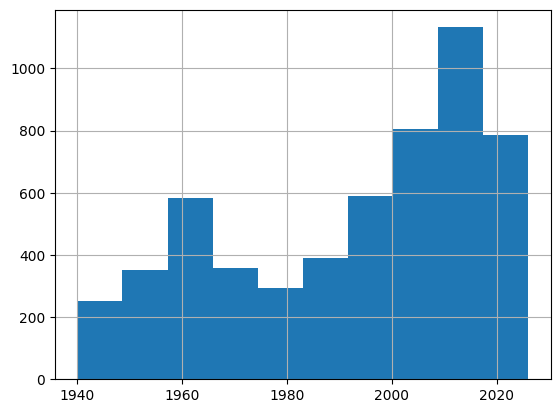

In [69]:
# 1
df = pd.read_excel('GSAF5.xls')


# 2
df = df.dropna(axis=1, how='all')
# All of the columns have some kind of data value, which means that we are unable to drop them


# 3
# There are a lot of missing or null values in this data set. I also see that a lot of the data values are not consistent (ex. In 'Fatal Y/N'
# there are values other than Y, N, and Unknown). This means that we have clean each column to ensure that the data values
# are consistent with one another.

# 4
df['Year'] = df['Year'].astype('Int64')
df['Year'] = df['Year'].replace(0, np.nan)
# The values range from 2026.0 to 0.0
# I decided to clean this variable by making all the values integers and making the values of 0 to NaN

df1940 = df[df['Year'] >= 1940]
df1940['Year'].hist()
# It seems like attachs have been steadily increasing since 1940, with a spike in attacks
# between 1950 to 1870 and 2010 to 2020.

<Axes: >

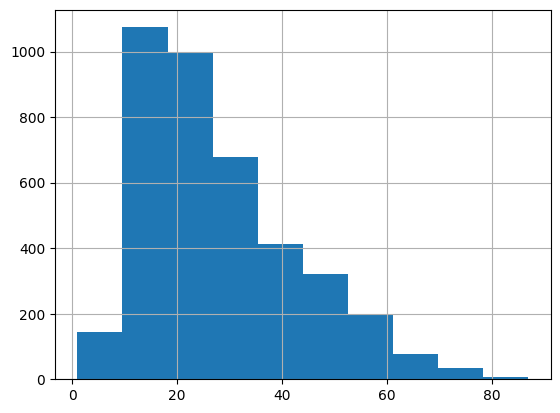

In [70]:
# 5
df['Age'] = df['Age'].replace('?', np.nan)

def clean_age(val):
    if pd.isna(val):
        return np.nan

    # averages age for values in format 'XX or XX'
    if isinstance(val, str) and 'or' in val:
        nums = [int(x) for x in val.split('or') if x.strip().isdigit()]
        return np.mean(nums) if nums else np.nan

    return val

df['Age'] = df['Age'].apply(clean_age)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] = df['Age'].round().astype('Int64')
df['Age'].hist()

In [71]:
# 6
df['Type'] = df['Type'].replace(['Invalid', 'Watercraft', 'Sea Disaster', 'Questionable',
                                 'Boat', 'Unconfirmed', '?', 'Unverified', 'Under investigation'], 'Unknown')
df['Type'] = df['Type'].replace('unprovoked', 'Unprovoked')
df['Type'] = df['Type'].replace(' Provoked', 'Provoked')
df['Type'] = df['Type'].fillna('Unknown')
df['Type'].value_counts()

# 5226 / 7074 = 73.9% of attacks are unprovoked

,count
Type,
Unprovoked,5226
Unknown,1204
Provoked,644


In [72]:
# 7
df['Fatal Y/N'] = df['Fatal Y/N'].replace(['F', 'M', 'n', 'Nq', 'UNKNOWN', 2017], 'Unknown')
df['Fatal Y/N'] = df['Fatal Y/N'].replace(['Y x 2', 'y'], 'Y')
df['Fatal Y/N'] = df['Fatal Y/N'].replace([' N', 'N '], 'N')
df['Fatal Y/N'] = df['Fatal Y/N'].fillna('Unknown')

df['Fatal Y/N'].value_counts(dropna=False)

,count
Fatal Y/N,
N,4941
Y,1490
Unknown,643


Fatal Y/N      N  Unknown     Y
Type                           
Provoked     613       10    21
Unknown      449      554   201
Unprovoked  3879       79  1268


<Axes: xlabel='Type'>

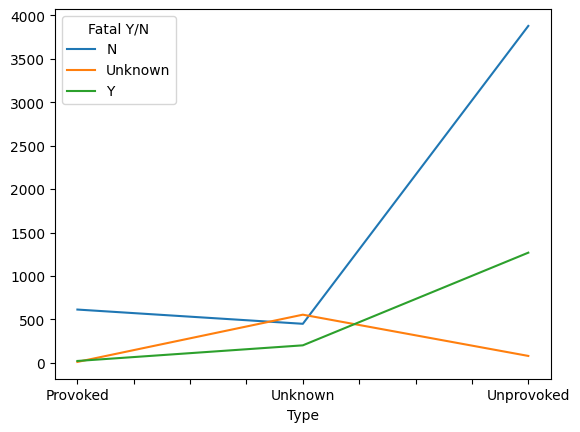

In [82]:
# 8 Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?
counts = df.groupby(['Type', 'Fatal Y/N']).size().unstack(fill_value=0)
print(counts)

counts.plot()

# According to our data, shark attacks are more likely to be fatal if unprovoked. This is suprising because
# I originially thought that provoked shark attacks would be more fatal compared to unprovoked ones.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

1. This paper is about how to tidy data effectively and efficiently so data analysts are easily able to analyze and manipulate the data. The abstract mentions that this paper goes over different models and visualizations to help tidy data with a small set of tools.

2. The tidy data standard provides a standard way for data scientists to organize values within a dataset. It intends to facilitate a streamlined approach to exploring and analyzing data.

3a. This sentence is trying to say that all tidy datasets follow a certain standard, which is why they are all alike. However, messy datasets do not follow any standard, which is why they have their own characteristics, or are messy in their own way.

3b. It is easy to figure out observations and variables if you are given a dataset because observations are always in row format, while variables are in columns. It is more difficult to differentiate between the two in general because context plays a big role.

4. Values are either numbers or strings. Each value belongs to a variable and an observation. A variable is a collection of all values that have the same attribute, while an observation has all values that are under the same unit.

5. Tidy data is a way to meaningfully map data. Each variable has to form a column. Every observation is stored in a row. Variables and observations form a table.

6. The most common problems with a messy dataset are that column headers are values and not the variable names, multiple variables are stored in one column, variables are stored in both rows and columns, multiple types of observational units are stored in the same table, and a single observational unit is stored in multiple tables. Table 4 is messy because variables are present in both columns and rows. Melting a dataset refers to turning columns into rows.

7. Table 11 is messy because it has a lot of empty data values. This makes it hard for the reader to grasp and understand the data. Table 12 is tidy is molten because it minimizes the amount of empty space and the columns contains the names of the variables.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

<Axes: >

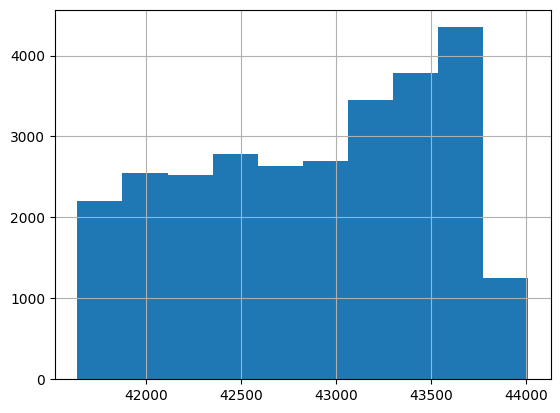

In [4]:
# 1
df = pd.read_csv('/content/data/ForeignGifts_edu.csv')

# 2
df['Foreign Gift Received Date'].hist()
# From the data, I can observe that the date is stored int form. I can also see that the number of gifts recieved have
# been increasing, until there is a sudden drop.

In [26]:
# 3
df['Gift Type'].value_counts()
# 61.2% are contract, 38.8% are monetary gifts, 0.04% are real estate
df

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
...,...,...,...,...,...,...,...,...,...,...
28216,28217,4279700,Albert Einstein College of Medicine,Bronx,NY,42704,381717,Contract,CHINA,Chia Tai TianQing Pharmaceutical Gr
28217,28218,4279700,Albert Einstein College of Medicine,Bronx,NY,42778,444938,Contract,ISRAEL,BL Oncology Ltd
28218,28219,4279700,Albert Einstein College of Medicine,Bronx,NY,42907,1064580,Contract,ENGLAND,Roche Products Limited
28219,28220,4279700,Albert Einstein College of Medicine,Bronx,NY,42948,737375,Contract,SWITZERLAND,F Hoffman-La Roche Ltd


In [27]:
# 4

# Top country in terms of gifts
df.groupby(['Country of Giftor']).size().sort_values(ascending=False).head(15)

,0
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [24]:
# Top country in terms of amount given
df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [30]:
# 5 What are the top 15 institutions in terms of the total amount of money they receive?
# Make a histogram of the total amount received by all institutions.

df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


<Axes: >

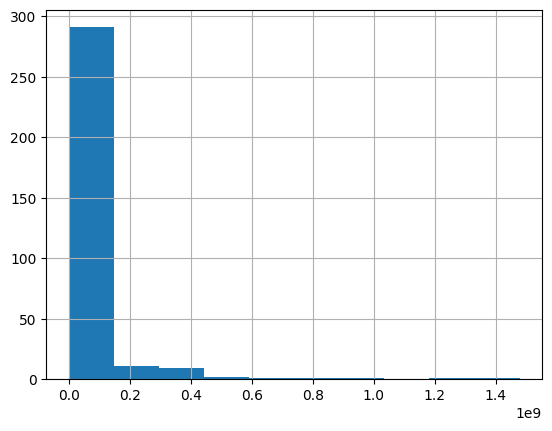

In [34]:
df.groupby('Institution Name')['Foreign Gift Amount'].sum().hist()

In [37]:
# 6 Which giftors provide the most money, in total?
df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(1)

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744


**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

In [44]:
# 1
df = pd.read_csv('/content/data/college_completion.csv')

# 2 How many observations and variables are in the data? Use .head() to examine the first few rows of data.
df.shape
# There are 63 variables and 3798 observations
df.head()

# 3 Cross tabulate control and level. Describe the patterns you see in words.
pd.crosstab(df['control'], df['level'])
# The cross tabulation shows that the majority of 2-year programs are private for profit or public
# and the majority of 4-year programs are private not-for-profit

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


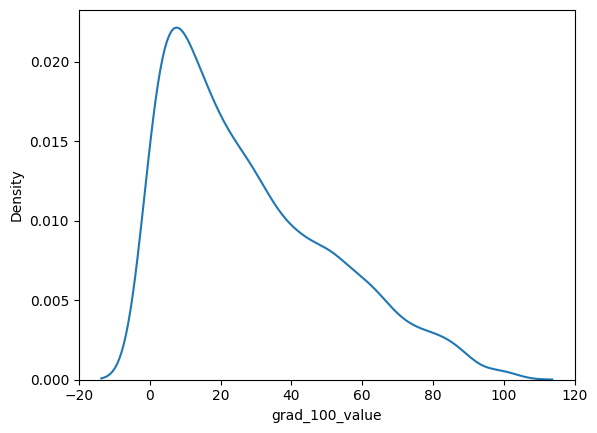

In [61]:
# 4
sns.kdeplot(data=df, x='grad_100_value')
df.groupby('control')['grad_100_value'].describe()

,grad_100_value
count,1499.000000
mean,17.430887
std,14.729443
min,0.000000
25%,6.900000
50%,13.200000
75%,23.250000
max,97.800000


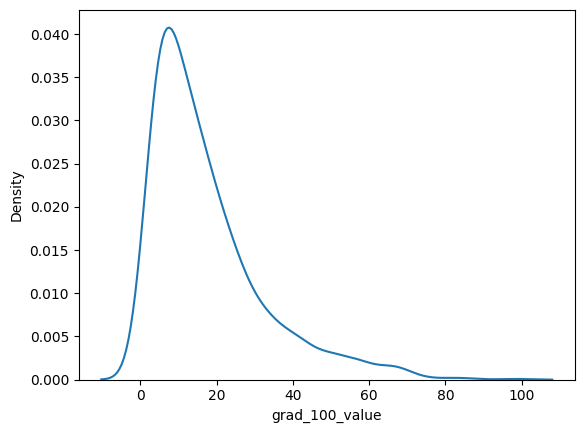

In [63]:
public_df = df[df['control'] == 'Public']
private_df = df[df['control'] == 'Private not-for-profit']
forprofit_df = df[df['control'] == 'Private for-profit']

sns.kdeplot(data=public_df, x='grad_100_value')
public_df['grad_100_value'].describe()

,grad_100_value
count,1189.000000
mean,41.660976
std,23.551231
min,0.000000
25%,25.000000
50%,41.000000
75%,58.300000
max,100.000000


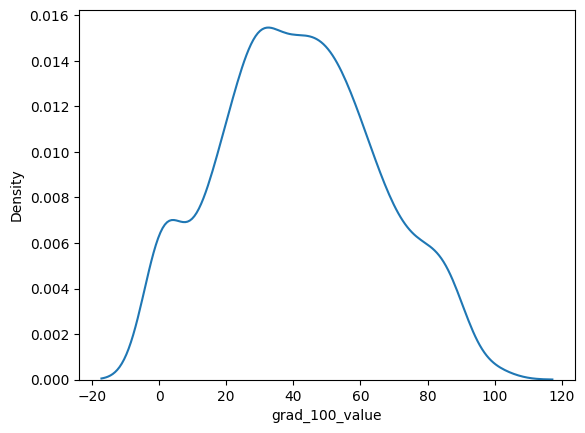

In [65]:
sns.kdeplot(data=private_df, x='grad_100_value')
private_df['grad_100_value'].describe()

,grad_100_value
count,779.000000
mean,29.108858
std,25.601687
min,0.000000
25%,6.950000
50%,24.700000
75%,46.750000
max,100.000000


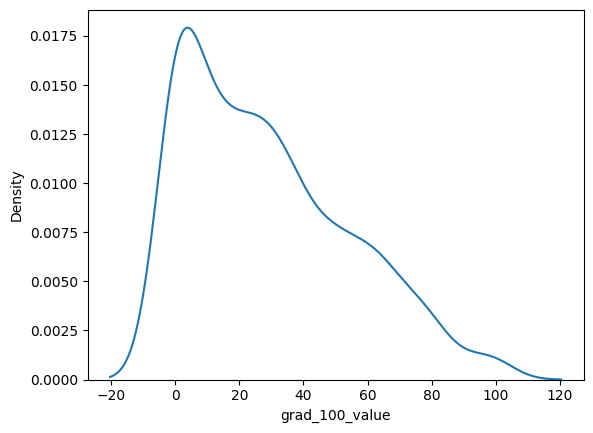

In [66]:
sns.kdeplot(data=forprofit_df, x='grad_100_value')
forprofit_df['grad_100_value'].describe()

# Private not-for-profit institutions have the most favorable graduation rates

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?